<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.6: Sentiment Analysis
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

Based on the video tutorial **Text Classification with Machine Learning,SpaCy and Scikit(Sentiment Analysis)** by **Jesse E. Agbe (JCharis)**.

## Data Source: UCI
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

### Dataset
- [Sentiment Labelled Sentences Data Set](http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)

### Abstract
The dataset contains sentences labelled with positive or negative sentiment.

- Data Set Characteristics: Text
- Number of Instances: 3000
- Area: N/A
- Attribute Characteristics: N/A
- Number of Attributes: N/A
- Date Donated: 2015-05-30
- Associated Tasks: Classification
- Missing Values? N/A
- Number of Web Hits: 102584

### Source
Dimitrios Kotzias dkotzias '@' ics.uci.edu

### Data Set Information
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

### Format
sentence &lt;tab&gt; score &lt;newline&gt;

### Details
Score is either 1 (for positive) or 0 (for negative)

The sentences come from three different websites/fields:
- imdb.com
- amazon.com
- yelp.com

For each website, there exist **500 positive** and **500 negative** sentences. Those were selected randomly for larger datasets of reviews.

We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

For the full datasets look:

- **imdb**: Maas et. al., 2011 _Learning word vectors for sentiment analysis_
- **amazon**: McAuley et. al., 2013 _Hidden factors and hidden topics: Understanding rating dimensions with review text_
- **yelp**: [Yelp dataset challenge](http://www.yelp.com/dataset_challenge)


### Attribute Information
The attributes are text sentences, extracted from reviews of products, movies, and restaurants

### Relevant Papers
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

### Citation Request
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

## Import libraries

In [2]:
!pip install regex

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\

In [5]:
!pip install -U pip setuptools wheel
!pip install -U spacy

  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\

  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107102 sha256=86bf3809f45d7cc8570da7d05e644db93bad9aeb5659bfdf3b36d73cef428526
  Stored in directory: c:\users\hong0108\appdata\local\pip\cache\wheels\83\a6\12\bf3c1a667bde4251be5b7a3368b2d604c9af2105b5c1cb1870
Successfully built smart-open
  Attempting uninstall: click
    Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-verify 3.4.2 requires backports.functools-lru-cache>=1.4, which is not installed.
conda-verify 3.4.2 requires backports.tempfile, which is not installed.


In [6]:
## Import Libraries
import pandas as pd

import regex as re
import spacy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

## Load data

Load Yelp, Amazon and Imdb Data.

Hint: Source is separated by <tab>s and has no headers.

In [40]:
colnames=['text', 'sentiment'] 

df_yelp = pd.read_csv("C:\\Users\\hong0108\\yelp_labelled.txt",names=colnames, header =None, sep="\t")
df_imdb = pd.read_csv("C:\\Users\\hong0108\\imdb_labelled_fixed.txt",names=colnames, header =None, sep="\t")
df_amazon = pd.read_csv("C:\\Users\\hong0108\\amazon_cells_labelled.txt",names=colnames, header =None, sep="\t")

dfs={'yelp': df_yelp,'imdb':df_imdb,'amazon':df_amazon}


In [41]:
df_yelp

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [42]:
df_imdb

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


In [43]:
df_amazon

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [17]:
print(type(dfs))

<class 'dict'>


In [14]:
df_amazon.shape

(1000, 2)

## Inspect the data

Check your datasets.

In [35]:
for ds in dfs.keys():
    print('Dataset: %s[%d row(s) x %d col(s)]' %(ds,dfs[ds].shape[0],dfs[ds].shape[1]))
    print("-"*75)

Dataset: yelp[1000 row(s) x 3 col(s)]
---------------------------------------------------------------------------
Dataset: imdb[1000 row(s) x 2 col(s)]
---------------------------------------------------------------------------
Dataset: amazon[1000 row(s) x 2 col(s)]
---------------------------------------------------------------------------


In [45]:
df_yelp['source']='yelp'
df_yelp

,text,sentiment,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp


In [46]:
df_imdb['source']='imdb'
df_amazon['source']='amazon'

In [47]:
df_imdb

,text,sentiment,source
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb
...,...,...,...
995,I just got bored watching Jessice Lange take h...,0,imdb
996,"Unfortunately, any virtue in this film's produ...",0,imdb
997,"In a word, it is embarrassing.",0,imdb
998,Exceptionally bad!,0,imdb


In [48]:
df_amazon

,text,sentiment,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
995,The screen does get smudged easily because it ...,0,amazon
996,What a piece of junk.. I lose more calls on th...,0,amazon
997,Item Does Not Match Picture.,0,amazon
998,The only thing that disappoint me is the infra...,0,amazon


## Merge the data

Merge all three datasets.

In [49]:
df=pd.concat(dfs.values(),ignore_index=True)

In [54]:
df

,text,sentiment,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
2995,The screen does get smudged easily because it ...,0,amazon
2996,What a piece of junk.. I lose more calls on th...,0,amazon
2997,Item Does Not Match Picture.,0,amazon
2998,The only thing that disappoint me is the infra...,0,amazon


In [58]:
print('Dataset: %s[%d row(s) x %d col(s)]\n' %('All',df.shape[0],df.shape[1]))
print(df.info())
print(df.sample(10))
print("-"*75)

Dataset: All[3000 row(s) x 3 col(s)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3000 non-null   object
 1   sentiment  3000 non-null   int64 
 2   source     3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB
None
                                                   text  sentiment  source
2070                                  Mic Doesn't work.          0  amazon
733         Overall, I like there food and the service.          1    yelp
2300                                   Sending it back.          0  amazon
2433  I highly recommend this modest priced cellular...          1  amazon
322   Service was exceptional and food was a good as...          1    yelp
338                        OMG, the food was delicioso!          1    yelp
2467                 Very disappointed in AccessoryOne.          0  amazon
1947 

## Export the data

Export merged datasets to as csv file.

In [59]:
df.to_csv("C:\\Users\\hong0108\\sentiments.csv",index=None)

## Prepare the stage
- Load spaCy

In [63]:
import spacy
from spacy.lang.en.examples import sentences 


In [68]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
doc

Apple is looking at buying U.K. startup for $1 billion

## Prepare the text
All the text handling and preparation concerned with the changes and modifications from the raw source text to a format that will be used for the actual processing, things like:
- handle encoding
- handle extraneous and international charaters
- handle simbols
- handle metadata and embeded information
- handle repetitions (such multiple spaces or newlines)

Clean text.

In [71]:
def clean_text(text):
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    # remove double quotes
    text = re.sub(r'"', '', text)

    return text

In [72]:
df['text']=df['text'].apply(clean_text)

In [73]:
df['text']

0                                Wow... Loved this place.
1                                      Crust is not good.
2               Not tasty and the texture was just nasty.
3       Stopped by during the late May bank holiday of...
4       The selection on the menu was great and so wer...
                              ...                        
2995    The screen does get smudged easily because it ...
2996    What a piece of junk.. I lose more calls on th...
2997                         Item Does Not Match Picture.
2998    The only thing that disappoint me is the infra...
2999    You can not answer calls with the unit, never ...
Name: text, Length: 3000, dtype: object

## Work the text
Concern with the meaning and the substance of the content to extract actual information.

Hint: Use techniques learned in previous labs. Remove StopWords, Punctuation, Lemmatize etc.

In [74]:
def convert_text(text):
    '''
    Use techniques learned in previous labs. Remove StopWords, Punctuation, Lemmatize etc.
    '''
    sent=nlp(text)
    ents={x.text: x for x in sent.ents}
    tokens=[]
    for w in sent:
        if w.is_stop or w.is_punct or w.is_digit:
            continue
        if w.text in ents:
            tokens.append(w.text)
        else:
            tokens.append(w.lemma_.lower())
    text=" ".join(tokens)
    return text

In [75]:
%%time
df['short'] = df['text'].apply(convert_text)

Wall time: 13.9 s


In [76]:
df.sample(10)

,text,sentiment,source,short
1505,About ten minutes into this film I started hav...,0,imdb,minute film start have second thought
2353,Their network coverage in Los Angeles is horri...,0,amazon,network coverage los angeles horrible
451,Food was so gooodd.,1,yelp,food gooodd
121,"Worst service to boot, but that is the least o...",0,yelp,bad service boot worry
353,It shouldn't take 30 min for pancakes and eggs.,0,yelp,min pancake egg
1158,I hate movies like that.,0,imdb,hate movie like
2190,The replacement died in a few weeks.,0,amazon,replacement die week
1883,This film tries to be a serious and sophistica...,0,imdb,film try sophisticated thriller horror flick f...
1178,The script is was there a script?,0,imdb,script script
2909,Seller shipped quickly and much cheaper than t...,1,amazon,seller ship quickly cheap competitor


## Modelling

In [100]:
# helper function to show results and charts
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

In [101]:
# Features and Labels
X = df['short']
y = df['sentiment']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [102]:
X

0                                          wow love place
1                                              Crust good
2                                     tasty texture nasty
3       stop late bank holiday rick steve recommendati...
4                              selection menu great price
                              ...                        
2995                  screen smudge easily touch ear face
2996                           piece junk lose call phone
2997                                   item match picture
2998                 thing disappoint infra red port irda
2999                                answer call unit work
Name: short, Length: 3000, dtype: object

## Use Bag-of-Words

In [103]:
# create a matrix of word counts from the text
counts = CountVectorizer()
counts

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [104]:
# do the actual counting
A = counts.fit_transform(X_train, y_train)
A

<2400x3575 sparse matrix of type '<class 'numpy.int64'>'
	with 12260 stored elements in Compressed Sparse Row format>

In [123]:
pd.DataFrame(A.toarray(),columns=counts.get_feature_names()).head()

,00,10,11,13,15,15pm,17,20th,2mp,30,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
A.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [110]:
# create a classifier using SVC
classifier = SVC(kernel='linear', probability=True)

In [111]:
# train the classifier with the training data
classifier.fit(A.toarray(), y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [107]:
# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = counts.transform(X_test)
B

<600x3575 sparse matrix of type '<class 'numpy.int64'>'
	with 2548 stored elements in Compressed Sparse Row format>

In [114]:
# make predictions based on the test data
predictions = classifier.predict(B.todense())
predictions

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [117]:
probalilities=classifier.predict_proba(B.todense())[:,1]
probalilities

array([8.74083549e-02, 9.43677867e-01, 3.60789076e-01, 2.59796102e-01,
       5.11248243e-01, 5.67053771e-02, 8.27638743e-01, 9.37824230e-01,
       9.07374149e-01, 6.88907862e-02, 2.40893677e-02, 7.58343091e-01,
       2.74864558e-01, 4.75825063e-01, 9.46573898e-01, 1.14288681e-01,
       8.46101146e-01, 9.33493767e-01, 5.41306803e-01, 3.37132473e-02,
       8.54476967e-02, 2.47276690e-02, 1.10324796e-01, 8.77870315e-01,
       9.53606844e-01, 6.70681198e-01, 8.04655055e-01, 1.12117823e-01,
       8.01559329e-01, 8.81230022e-01, 2.93867881e-01, 8.75591349e-01,
       6.14935959e-01, 7.44911961e-01, 1.87054695e-01, 7.78916207e-01,
       2.55944745e-02, 8.95590953e-01, 2.01300535e-01, 9.56714547e-01,
       9.14319423e-01, 7.23495927e-01, 3.97353307e-01, 5.46326043e-01,
       8.10596380e-01, 2.50065071e-01, 9.45151018e-01, 4.22255885e-01,
       9.99991455e-01, 9.58733270e-01, 7.54122349e-01, 9.43304694e-01,
       9.66769787e-01, 6.97197924e-01, 1.64922488e-01, 1.39611162e-01,
      

In [118]:
# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.7833


## Repeat using TF-IDF
TF-IDF = Term Frequency - Inverse Document Frequency

In [121]:
# create a matrix of word counts from the text
# use TF-IDF
tfidf = TfidfVectorizer()
# do the actual counting
A = tfidf.fit_transform(X_train, y_train)

# train the classifier with the training data
classifier.fit(A.toarray(), y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = tfidf.transform(X_test)

# make predictions based on the test data
predictions = classifier.predict(B.toarray())

probalilities=classifier.predict_proba(B.toarray())[:,1]

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.7783


In [122]:
pd.DataFrame(A.todense(),columns=counts.get_feature_names()).head()

,00,10,11,13,15,15pm,17,20th,2mp,30,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Repeating it all for comparision
Repeating the whole lot in one big block

Find 'Accuracy', 'Precision', 'Recall', 'ROC_AUC' using CountVectorizer and TfidfVectorizer and keep the result in a dataframe.

*********
* Count *
*********
Accuracy : 0.7783 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7879 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7697 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7784                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


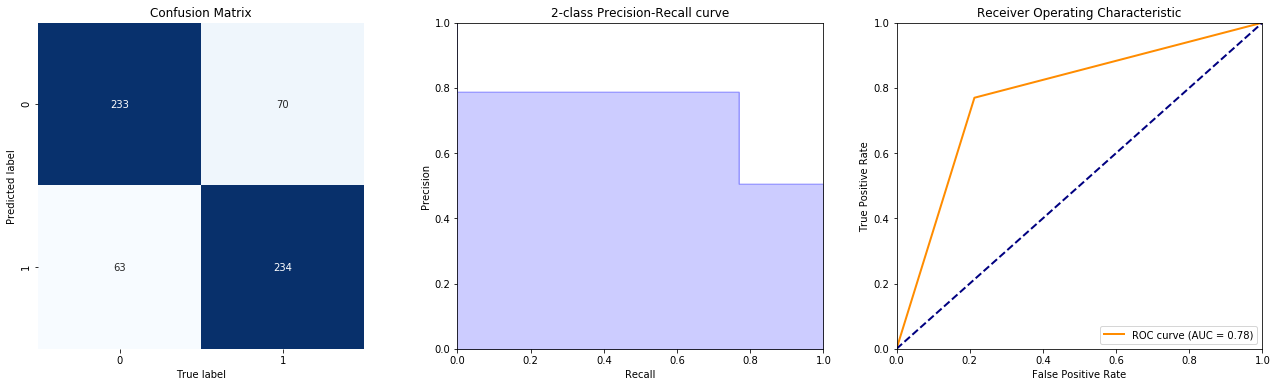

**********
* TF-IDX *
**********
Accuracy : 0.7783 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7879 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7697 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7784                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


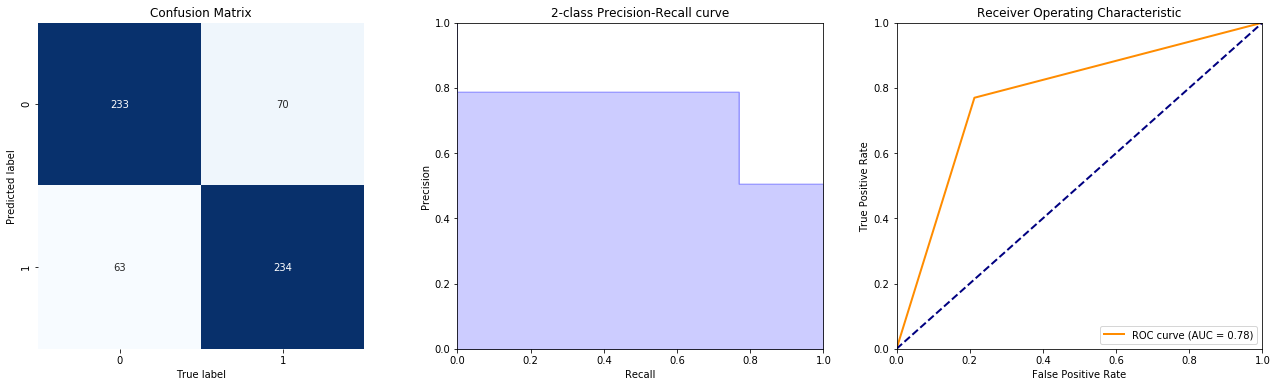

In [132]:
results=pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','ROC_AUC'])
models=['Count','TF-IDX']
for i,m in enumerate([CountVectorizer(), TfidfVectorizer()]):
    print("*" * (len(models[i])+4))
    print("* %s *" % models[i])
    print("*" * (len(models[i])+4))
    counts = m
    A = tfidf.fit_transform(X_train, y_train)

    # train the classifier with the training data
    classifier.fit(A.toarray(), y_train)

    # do the transformation for the test data
    # NOTE: use `transform()` instead of `fit_transform()`
    B = tfidf.transform(X_test)

    # make predictions based on the test data
    predictions = classifier.predict(B.toarray())

    probalilities=classifier.predict_proba(B.toarray())[:,1]
    
    accuracy_,precision_,recall_,roc_auc_, =show_summary_report(y_test,predictions)
    
    results.loc[i]={'Model':models[1],
                   'Accuracy':accuracy_,
                   'Precision':precision_,
                   'Recall':recall_,
                   'ROC_AUC':roc_auc_}
    

In [133]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,TF-IDX,0.778333,0.787879,0.769737,0.77845
1,TF-IDX,0.778333,0.787879,0.769737,0.77845




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



